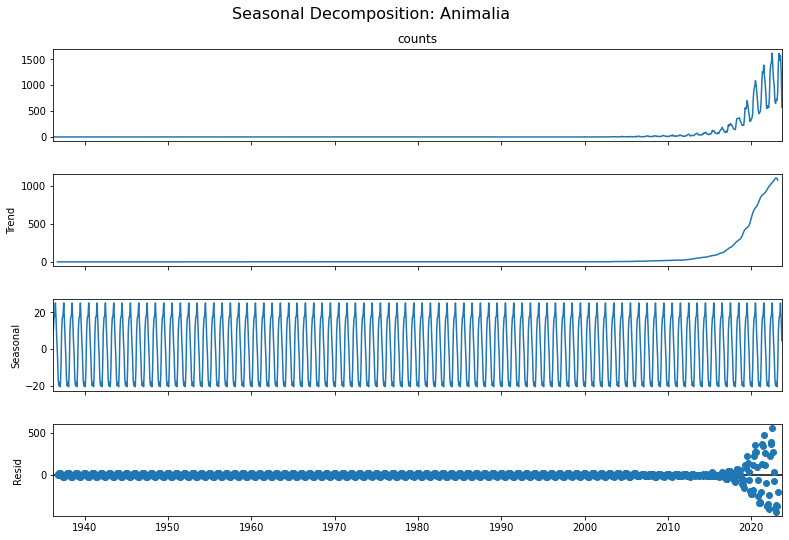

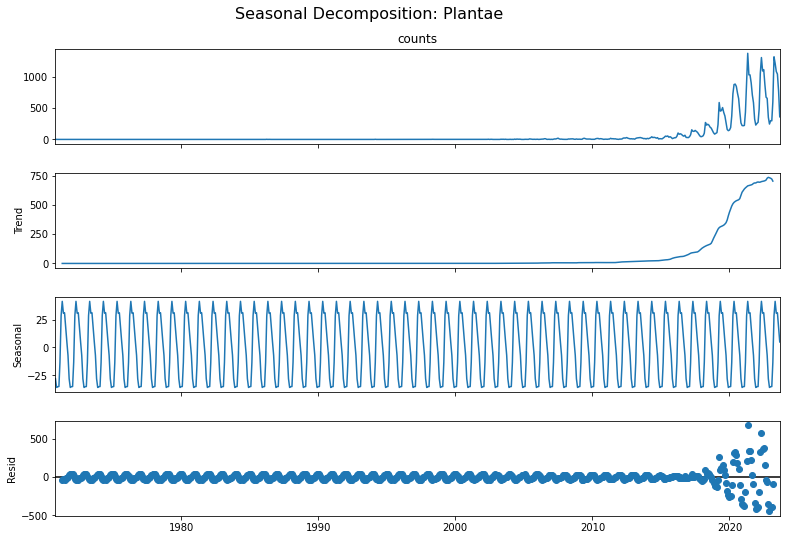

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = 'dataset_11.csv' 
data = pd.read_csv(file_path)


# Data Cleaning


# Convert `eventDate` to datetime and drop rows with missing dates
data['eventDate'] = pd.to_datetime(data['eventDate'], errors='coerce')
data = data.dropna(subset=['eventDate'])

# Extract year and month from eventDate
data['year'] = data['eventDate'].dt.year
data['month'] = data['eventDate'].dt.month

# Drop irrelevant columns
irrelevant_columns = [
    'verbatimScientificNameAuthorship', 'locality', 'individualCount', 
    'coordinatePrecision', 'elevation', 'elevationAccuracy', 'depth', 
    'depthAccuracy', 'recordNumber', 'typeStatus', 'establishmentMeans'
]
cleaned_data = data.drop(columns=irrelevant_columns)


# Prepare Time Series


kingdom = "Animalia"
kingdom_data = cleaned_data[cleaned_data['kingdom'] == kingdom]


time_series_data = kingdom_data.groupby(['year', 'month']).size().reset_index(name='counts')


time_series_data['date'] = pd.to_datetime(time_series_data[['year', 'month']].assign(day=1))
time_series = time_series_data.set_index('date')['counts']


time_series = time_series.asfreq('MS').fillna(0)


# Seasonal Decomposition



decomposition = seasonal_decompose(time_series, model='additive', period=12)


fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle(f"Seasonal Decomposition: {kingdom}", fontsize=16)


plt.savefig(f"{kingdom.lower()}_seasonality.png")
plt.show()


#########

kingdom = "Plantae"
kingdom_data = cleaned_data[cleaned_data['kingdom'] == kingdom]

time_series_data = kingdom_data.groupby(['year', 'month']).size().reset_index(name='counts')


time_series_data['date'] = pd.to_datetime(time_series_data[['year', 'month']].assign(day=1))
time_series = time_series_data.set_index('date')['counts']

time_series = time_series.asfreq('MS').fillna(0)


# Seasonal Decomposition


decomposition = seasonal_decompose(time_series, model='additive', period=12)


fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle(f"Seasonal Decomposition: {kingdom}", fontsize=16)

plt.savefig(f"{kingdom.lower()}_seasonality.png")
plt.show()
